# Mapping Hexagons on a Sphere

Square maps are great for tabletop games, but what about hexagons?

Hexagons are often used to simulate a space where things are more equally spaced in every direction, but these are not easy to represent in a computer array.  Not easy, but possible.

The second thing about hexagons is that you can use them to map a space onto a sphere, like a football with a mix of hexagons and 12 pentagons.  The football has 20 hexagons and 12 pentagons, but if you use more hexagons, you will always have 12 pentagons like the points on a 20 sided dice (Icosahedron - https://en.wikipedia.org/wiki/Icosahedron)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
%matplotlib inline

##### Functions

In [3]:
def thetas(sides=6):
    return [x / sides * 2 * np.pi for x in range(sides)]

def hexagon(x, y, r=1/np.sqrt(3)):
    points = [[np.cos(t) * r + x, np.sin(t) * r + y] for t in thetas()]
    return Polygon(np.array(points))

def hexcolor(hex_type):
    colors = ["white", "blue", "cyan", "green", "yellow", "orange", "red", "purple"]
    return colors[hex_type % len(colors)]

##### Draw a plot of the hexagon map

In [4]:
def add_hexes(ax, bitmap):
    x_scale = np.sqrt(3) / 2
    y_scale = 1 / 2
    x_len = bitmap.shape[0]
    y_len = bitmap.shape[1]
    for x in range(x_len):
        for y in range(y_len):
            if bitmap[x, y] > 0:
                h = hexagon(x * x_scale, y * y_scale)
                h.set_facecolor(hexcolor(bitmap[x, y]))
                h.set_edgecolor("black")
                h.set_alpha(0.4)
                ax.add_patch(h)
    ax.set_xlim(xmax=(x_len*x_scale))
    ax.set_ylim(ymax=(y_len*y_scale))
    
def plot_map(bitmap):
    fig, ax = plt.subplots()
    add_hexes(ax, bitmap)
    plt.show()

##### Prepare the map data functions

In [5]:
def empty_map(size=21):
    return np.zeros((size, size), dtype=np.int8)
    
def full_map(size=21, hex_type=1):
    bitmap = empty_map(size=size)
    for x in range(1,size - 1):
        for y in range(1,size - 1):
            if (x + y) % 2 == 0:
                bitmap[x, y] = hex_type
    return bitmap

###### Show the map

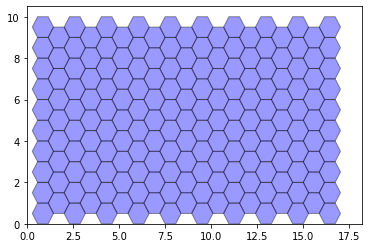

In [6]:
bitmap = full_map()
plot_map(bitmap)

In [7]:
print(bitmap)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### Make the hexagonal map that can be wrapped on a sphere (football)

##### The Turtle class that can navigate the bitmap

In [8]:
class Turtle:
    x = 0
    y = 0
    bitmap = None
    facing = 0
    vectors = [[0,2],[1,1],[1,-1],[0,-2],[-1,-1],[-1,1]]
    def __init__(self, bitmap):
        self.bitmap = bitmap

    def __repr__(self):
        return f"X: {self.x} - Y: {self.y} - F: {self.facing}"
        
    def place(self, x, y, facing=0):
        self.x = x
        self.y = y
        self.facing = facing

    def left(self, turns=1):
        for t in range(turns):
            self.facing = (self.facing + len(self.vectors) - 1) % len(self.vectors)

    def right(self, turns=1):
        for t in range(turns):
            self.facing = (self.facing + 1) % len(self.vectors)

    def move(self):
        self.x += self.vectors[self.facing][0]
        self.y += self.vectors[self.facing][1]

    def set_value(self, value):
        self.bitmap[self.x, self.y] = value

##### Initialise an empty map and start a turtle

In [9]:
bitmap = empty_map()
turtle = Turtle(bitmap)

##### Start in the West and colour the Northern hemisphere hexagons

In [10]:
turtle.place(4, 12)
turtle.set_value(7)
turtle.right()
for x in range(5):
    turtle.move()
    turtle.set_value(1)
    turtle.left()
    turtle.move()
    turtle.set_value(2)
    turtle.move()
    turtle.set_value(6)
    turtle.right(2)
    turtle.move()
    turtle.set_value(4)
    turtle.right()
    turtle.move()
    turtle.set_value(4)
    turtle.move()
    turtle.set_value(3)
    turtle.left(2)
turtle.set_value(7)

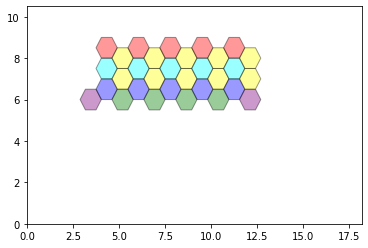

In [11]:
plot_map(bitmap)

##### Move down to the equator

In [12]:
turtle.move()
turtle.set_value(4)
turtle.right(2)
turtle.move()
turtle.set_value(4)
turtle.right()

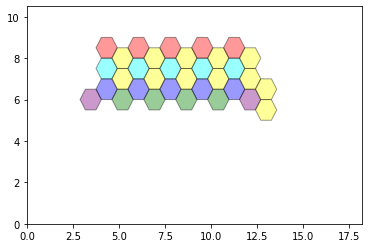

In [13]:
plot_map(bitmap)

##### Traverse the equator

In [14]:
turtle.move()
turtle.set_value(1)
turtle.right()
turtle.move()
turtle.set_value(1)
turtle.left()
for x in range(4):
    turtle.move()
    turtle.set_value(1)
    turtle.right()
    turtle.move()
    turtle.set_value(1)
    turtle.left()
turtle.left()
turtle.move()
turtle.set_value(7)
turtle.left()

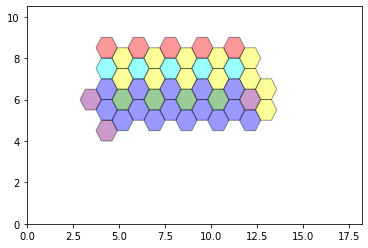

In [15]:
plot_map(bitmap)

##### colour the Southern hemisphere hexagons

In [16]:
for x in range(5):
    turtle.move()
    turtle.set_value(1)
    turtle.right()
    turtle.move()
    turtle.set_value(2)
    turtle.move()
    turtle.set_value(6)
    turtle.left(2)
    turtle.move()
    turtle.set_value(4)
    turtle.left()
    turtle.move()
    turtle.set_value(4)
    turtle.move()
    turtle.set_value(3)
    turtle.right(2)
turtle.set_value(7)

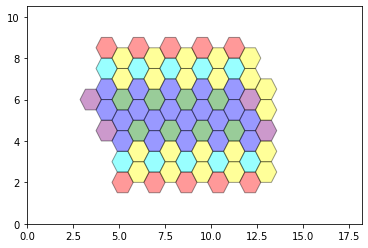

In [17]:
plot_map(bitmap)

##### Do the remaining edge colours

In [18]:
turtle.move()
turtle.set_value(4)
turtle.left(2)
turtle.move()
turtle.set_value(4)

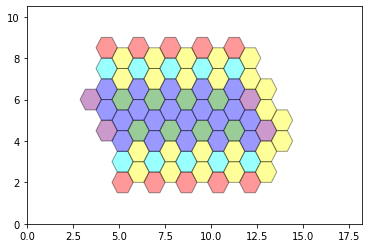

In [19]:
plot_map(bitmap)

In [20]:
for x in range(3):
    turtle.move()
turtle.left()
turtle.move()
turtle.move()
for x in range(5):
    turtle.move()
    turtle.left()
    turtle.move()
    turtle.right()
turtle.left(2)
turtle.move()
turtle.set_value(4)
turtle.move()
turtle.set_value(4)
turtle.right()
turtle.move()
turtle.set_value(4)
turtle.left()
turtle.move()
turtle.set_value(4)
turtle.left()
turtle.move()
turtle.set_value(4)
turtle.right()
turtle.move()
turtle.set_value(4)
turtle.left()
turtle.move()
turtle.set_value(4)
turtle.right()
turtle.move()
turtle.set_value(4)

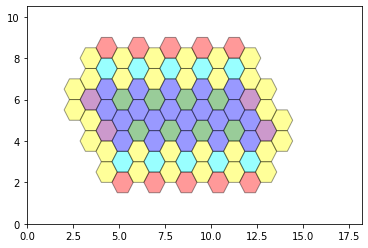

In [21]:
plot_map(bitmap)

In [22]:
print(bitmap)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 4 0 7 0 4 0 4 0 0 0 0]
 [0 0 0 0 0 4 0 4 0 7 0 1 0 1 0 2 0 6 0 0 0]
 [0 0 0 0 6 0 2 0 1 0 1 0 3 0 4 0 4 0 0 0 0]
 [0 0 0 0 0 4 0 4 0 3 0 1 0 1 0 2 0 6 0 0 0]
 [0 0 0 0 6 0 2 0 1 0 1 0 3 0 4 0 4 0 0 0 0]
 [0 0 0 0 0 4 0 4 0 3 0 1 0 1 0 2 0 6 0 0 0]
 [0 0 0 0 6 0 2 0 1 0 1 0 3 0 4 0 4 0 0 0 0]
 [0 0 0 0 0 4 0 4 0 3 0 1 0 1 0 2 0 6 0 0 0]
 [0 0 0 0 6 0 2 0 1 0 1 0 3 0 4 0 4 0 0 0 0]
 [0 0 0 0 0 4 0 4 0 3 0 1 0 1 0 2 0 6 0 0 0]
 [0 0 0 0 6 0 2 0 1 0 1 0 7 0 4 0 4 0 0 0 0]
 [0 0 0 0 0 4 0 4 0 7 0 4 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### How do these hexagons map to a sphere
The blue hexagons are mapped to the hexagons on a football.  The green hexagons are in fact pentagons, so the edge attached to a yellow hexagon does not exist in reality,  The purple hexagons are the same location on the sphere, but are also in fact the pentagons on the football.  They are equivalent to the green hexagons.  The aqua hexagons are the "poles" of the sphere and therefore equivalent and also pentagons.  The red hexagons are not accessible.  The yellow hexagons should be mapped to another hexagon in the map.

### Expanding the map
It seems that we can build a map by drawing a perimeter, then filling in the middle

##### Functions to draw the perimeter

In [23]:
def edgewise(turtle, value=5):
    for s in range(STEPS):
        turtle.right()
        turtle.move()
        turtle.set_value(1)
        turtle.left()
        turtle.move()
        turtle.set_value(value)

def pole(turtle):
    turtle.set_value(2)
    turtle.move()
    turtle.set_value(6)
    turtle.right(3)
    turtle.move()
    turtle.left()

def hemisphere(turtle):
    for s in range(SECTIONS):
        edgewise(turtle)
        pole(turtle)
        edgewise(turtle)
        turtle.set_value(3)
        turtle.left(2)
    turtle.set_value(7)
    turtle.right(2)
    edgewise(turtle, 7)
    turtle.right()
        
def perimeter(turtle):
    hemisphere(turtle)
    hemisphere(turtle)

##### Draw the perimeter with the turtle

In [24]:
SECTIONS = 5
STEPS = 5
bitmap = empty_map(STEPS * 12)
turtle = Turtle(bitmap)
turtle.place(2, (STEPS + 1) * 6)
perimeter(turtle)

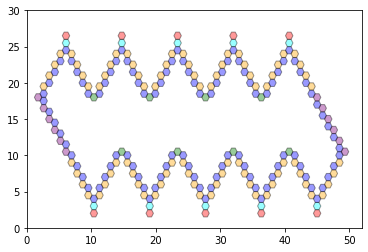

In [25]:
plot_map(bitmap)

##### Fill the middle with blues

In [26]:
markers = (1, 3)
for x in range(bitmap.shape[0]):
    mark = False
    for y in range(x % 2, bitmap.shape[1], 2):
        if bitmap[x, y] in markers:
            mark = not mark
        else:
            if mark:
                bitmap[x, y] = 1

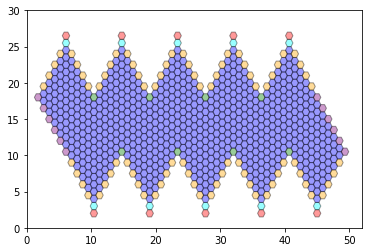

In [27]:
plot_map(bitmap)

##### Add the virtual hexagons around the outside

In [28]:
markers = (1, 2, 3, 5, 7)
neighbours = ([0, 2], [-1, 1], [1, 1], [0, -2], [-1, -1], [1, -1])
for x in range(1, bitmap.shape[0] - 1):
    for y in range(2 + x % 2, bitmap.shape[1] - 2, 2):
        if bitmap[x, y] == 0:
            for n in neighbours:
                if bitmap[x + n[0], y + n[1]] in markers:
                    bitmap[x, y] = 4

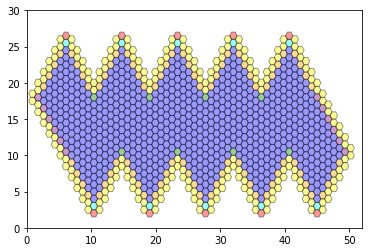

In [29]:
plot_map(bitmap)